# Silhouette Score

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Example data
X = np.random.rand(50, 2)
X

array([[0.96090956, 0.65616307],
       [0.86178614, 0.2789443 ],
       [0.9410916 , 0.85711419],
       [0.30525894, 0.70831889],
       [0.41149009, 0.76801853],
       [0.1887793 , 0.31560904],
       [0.86473552, 0.62773211],
       [0.3977271 , 0.19767852],
       [0.6357741 , 0.47635604],
       [0.34499749, 0.19671266],
       [0.24102457, 0.25406233],
       [0.17297343, 0.06926825],
       [0.1882001 , 0.18312394],
       [0.4496836 , 0.13225155],
       [0.34447127, 0.15394206],
       [0.98375067, 0.0902856 ],
       [0.53997463, 0.7140804 ],
       [0.94734398, 0.69273791],
       [0.4742657 , 0.86721848],
       [0.62249755, 0.78938116],
       [0.45434076, 0.72825009],
       [0.19345573, 0.88552428],
       [0.23002524, 0.95330273],
       [0.05752176, 0.09413163],
       [0.7411617 , 0.90851638],
       [0.53128258, 0.89253999],
       [0.08203551, 0.32155804],
       [0.01880392, 0.20425455],
       [0.87683536, 0.40164195],
       [0.56451627, 0.8029317 ],
       [0.

In [10]:
# Range of k to evaluate
k_range = range(2, 11)

# Store silhouette scores
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_
    #print(labels)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Find optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]

print(f"Optimal k: {optimal_k}")

Optimal k: 3


In [11]:
silhouette_scores

[0.39452690348244873,
 0.4786652857021459,
 0.4763424657718705,
 0.4622737147037829,
 0.44996194252307975,
 0.424576323529142,
 0.41884182792539826,
 0.44273858130842825,
 0.4427511319211079]

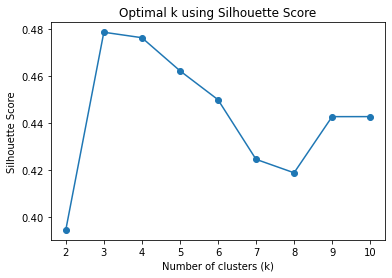

In [12]:
import matplotlib.pyplot as plt

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Optimal k using Silhouette Score')
plt.show()


# Dunn Index

Optimal k: 9


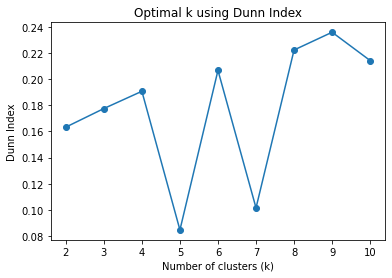

In [14]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Function to calculate Dunn Index
def dunn_index(data, labels):
    unique_clusters = np.unique(labels)
    intra_cluster_distances = []
    inter_cluster_distances = []
    
    # Compute intra-cluster distances (maximum distance within each cluster)
    for cluster in unique_clusters:
        cluster_points = data[labels == cluster]
        if len(cluster_points) > 1:
            intra_cluster_distances.append(np.max(cdist(cluster_points, cluster_points)))
    
    # Compute inter-cluster distances (minimum distance between clusters)
    for i in range(len(unique_clusters)):
        for j in range(i + 1, len(unique_clusters)):
            cluster_i_points = data[labels == unique_clusters[i]]
            cluster_j_points = data[labels == unique_clusters[j]]
            inter_cluster_distances.append(np.min(cdist(cluster_i_points, cluster_j_points)))
    
    # Dunn Index formula
    if intra_cluster_distances and inter_cluster_distances:
        return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)
    else:
        return 0  # Avoid division by zero

# Example data
np.random.seed(42)
X = np.random.rand(50, 2)

# Range of k to evaluate
k_range = range(2, 11)
dunn_indices = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_
    #print(labels)
    score = dunn_index(X, labels)
    dunn_indices.append(score)

# Find optimal k
optimal_k = k_range[np.argmax(dunn_indices)]
print(f"Optimal k: {optimal_k}")

# Plot Dunn Index vs k
import matplotlib.pyplot as plt

plt.plot(k_range, dunn_indices, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Dunn Index')
plt.title('Optimal k using Dunn Index')
plt.show()


# plotting for viualization of clusters for different values of K

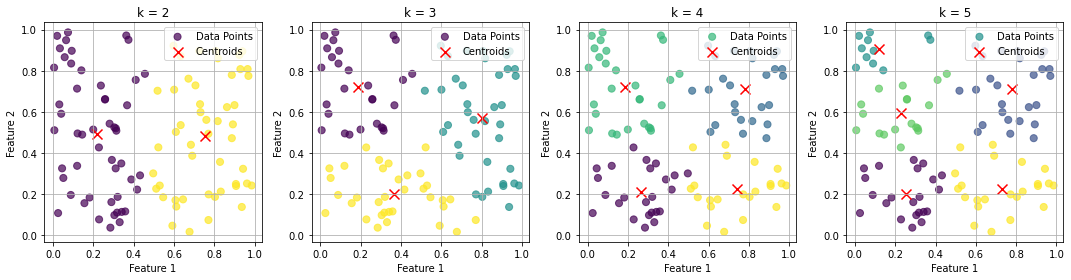

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Example data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 points in 2D space

# Function to visualize clusters for a given k
def plot_clusters(X, k_range):
    fig, axes = plt.subplots(1, len(k_range), figsize=(15, 4))
    for i, k in enumerate(k_range):
        # Perform k-means clustering
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        
        # Plot data points
        axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, label='Data Points')
        # Plot centroids
        axes[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        
        axes[i].set_title(f"k = {k}")
        axes[i].set_xlabel("Feature 1")
        axes[i].set_ylabel("Feature 2")
        axes[i].legend(loc='upper right')
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

# Define range of k values to visualize
k_values = [2, 3, 4, 5]
plot_clusters(X, k_values)


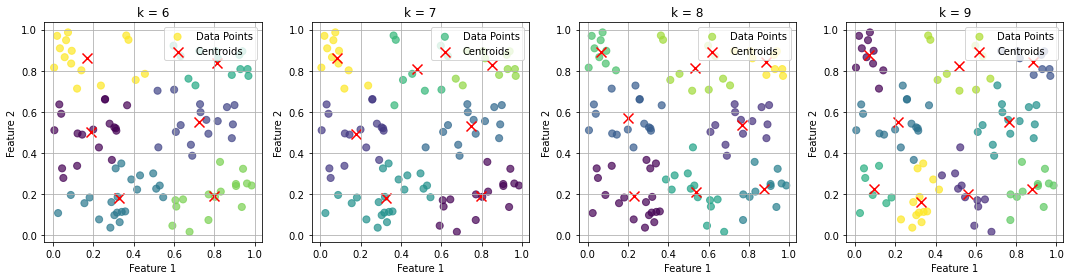

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Example data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 points in 2D space

# Function to visualize clusters for a given k
def plot_clusters(X, k_range):
    fig, axes = plt.subplots(1, len(k_range), figsize=(15, 4))
    for i, k in enumerate(k_range):
        # Perform k-means clustering
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        
        # Plot data points
        axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, label='Data Points')
        # Plot centroids
        axes[i].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
        
        axes[i].set_title(f"k = {k}")
        axes[i].set_xlabel("Feature 1")
        axes[i].set_ylabel("Feature 2")
        axes[i].legend(loc='upper right')
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

# Define range of k values to visualize
k_values = [6, 7, 8, 9]
plot_clusters(X, k_values)